# Valuation of European Call Option in <font color = 'green'>Black-Scholes-Merton (BSM)</font> Model

In [11]:
from scipy import stats
import math
import numpy as np
import matplotlib.pyplot as plt

### Parameters

        S_0 -  initial index level
        K - strike price
        T - call option maturity
        r - constant short rate
        vola - constant volatility factor of diffusion

In [3]:
def BSM_call_value(S_0, K, T, r, vola):
    ''' Analytical European call option value for Black-Scholes-Merton (1973).
    
        Parameters
        ==========
        
        S0: float
        initial index level
        
        K: float
        strike price
        
        T: float
        time-to-maturity
        
        r: float
        constant short rate
        
        vola: float
        constant volatility factor
        
        Returns
        =======
        
        call_value: float
        European call option present value
    '''
    S_0 = float(S_0) # make sure to have float type
    d1 = (math.log(S_0 / K) + (r + 0.5 * vola ** 2) * T) / (vola * math.sqrt(T))
    d2 = d1 - vola * math.sqrt(T)
    call_value = (S_0 * stats.norm.cdf(d1, 0.0, 1.0) - K * math.exp(-r * T) * stats.norm.cdf(d2, 0.0, 1.0))
    
    return call_value

In [4]:
S_0 = 110
K = 115
T = 3
r = 0.05
vola = 0.05

In [7]:
print("Value of European call option is: %5.3f"%BSM_call_value(S_0, K, T, r, vola))

Value of European call option is: 11.506


# Valuation of European Call Option in <font color = 'green'>Monte Carlo Simulation</font> 

In [9]:
I = 100000

rand = np.random.standard_normal(I)

ST = S_0 * np.exp((r - 0.5 * vola ** 2) * T + np.sqrt(T) * vola * rand)

pv = np.sum(np.maximum(ST - K, 0) * np.exp(-r * T)) / I # MCS estimator
# Result Output
print("Value of European call option is %5.3f" % pv)

Value of European call option is 11.527


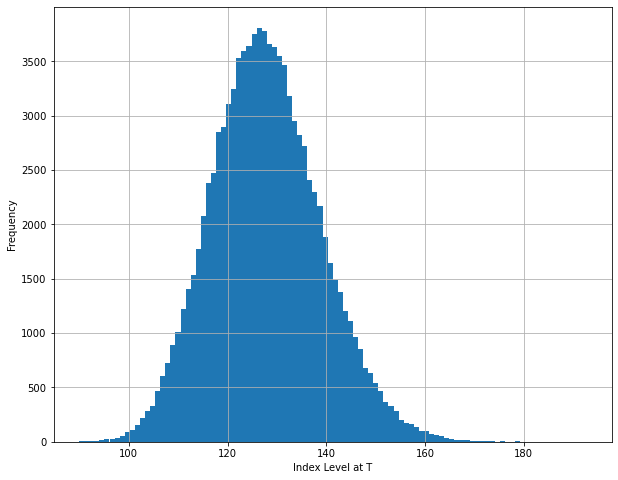

In [13]:
plt.figure(figsize=(10,8))
plt.hist(ST, 100)
plt.xlabel('Index Level at T')
plt.ylabel('Frequency')
plt.grid(True)